In [1]:
from mmpose.apis import (inference_bottom_up_pose_model, init_pose_model,
                         vis_pose_result)
from mmcv import Config
from mmpose.datasets import build_dataloader, build_dataset
from mmpose.datasets import DatasetInfo
from matplotlib import pyplot as plt
import os
import cv2

In [2]:
checkpoint = '/mnt/ssd/marley/ID_Card/mmpose/work_dirs/overfit_higherhrnet_w32_IDCard_512x512/best_AP_epoch_4.pth'
config_file = '/mnt/ssd/marley/ID_Card/mmpose/configs/ID_card/overfit_higherhrnet_w32_IDCard_512x512.py'
cfg = Config.fromfile(config_file)

In [3]:
model = init_pose_model(cfg, checkpoint)
dataset_info = model.cfg.data['test'].get('dataset_info', None)
dataset_info = DatasetInfo(dataset_info)

Use load_from_local loader


In [5]:
images = [os.path.join('/mnt/ssd/marley/ID_Card/ID_card_data/val',img) for img in os.listdir('/mnt/ssd/marley/ID_Card/ID_card_data/val') if img.endswith('.jpg')]
dataset = build_dataset(cfg.data.test, dict(test_mode=True))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
=> num_images: 3400


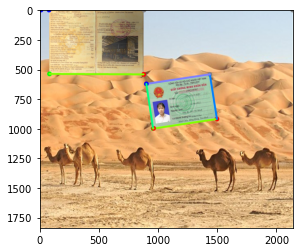

In [7]:
img = images[0]
keypoint_results, returned_outputs = inference_bottom_up_pose_model(model, img, 'BottomUpIDCardDataset', dataset_info, return_heatmap=True)
# for result in keypoint_results:
#     result['keypoints'][:,0] = result['keypoints'][:,0]/0.23958820776789894
#     result['keypoints'][:,1] = result['keypoints'][:,1]/0.27871529667936856
vis_result = vis_pose_result(model,
                             img,
                             keypoint_results,
                             radius=20,
                             thickness=15,
                             dataset=model.cfg.data.test.type,
                             show=False)
vis_result = cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB)
plt.imshow(vis_result)

In [8]:
keypoint_results

[{'keypoints': array([[8.9847217e+02, 6.2289600e+02, 1.0000000e+00],
         [9.5587842e+02, 9.9962451e+02, 1.0000000e+00],
         [1.4940620e+03, 9.1889697e+02, 1.0000000e+00],
         [1.4348618e+03, 5.4216846e+02, 1.0000000e+00]], dtype=float32),
  'score': 0.87305325,
  'area': 272456.2},
 {'keypoints': array([[7.6845215e+01, 3.9697266e-01, 1.0000000e+00],
         [8.0433105e+01, 5.3858057e+02, 1.0000000e+00],
         [8.7515088e+02, 5.4216846e+02, 1.0000000e+00],
         [8.7873877e+02, 3.9697266e-01, 1.0000000e+00]], dtype=float32),
  'score': 0.8350114,
  'area': 434443.06},
 {'keypoints': array([[8.9847217e+02, 6.2289600e+02, 1.0000000e+00],
         [9.5587842e+02, 9.9962451e+02, 1.0000000e+00],
         [9.5946631e+02, 9.9783057e+02, 1.0000000e+00],
         [2.1345005e+03, 3.9697266e-01, 1.0000000e+00]], dtype=float32),
  'score': 0.13864937,
  'area': 1235073.5},
 {'keypoints': array([[8.6752930e+00, 3.9697266e-01, 1.0000000e+00],
         [8.0433105e+01, 5.3858057e+

In [7]:
import numpy as np
heatmap = returned_outputs[0]['heatmap'][0]

In [8]:
heatmap.shape

(4, 512, 640)

In [9]:
from skimage import exposure
img = cv2.resize(vis_result, (640, 512))
for slice in heatmap:
    map_img = exposure.rescale_intensity(slice, out_range=(0, 255))
    map_img = np.uint8(map_img) 
    heatmap_img = cv2.applyColorMap(map_img, cv2.COLORMAP_JET)
    img = cv2.addWeighted(heatmap_img, 0.3, img, 0.8, 0)

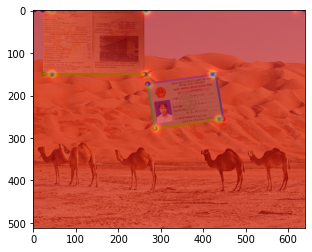

In [10]:
plt.imshow(img)

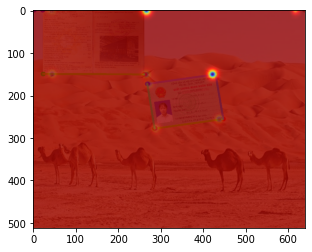

In [11]:
fin = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
plt.imshow(fin)

In [12]:
fin.shape

(512, 640, 3)

In [13]:
heatmap = np.load('heatmap.npy', allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'heatmap.npy'

In [ ]:
import seaborn as sns

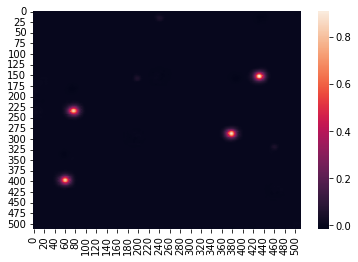

In [ ]:
ax = sns.heatmap(heatmap[0][2])